<a href="https://colab.research.google.com/github/mparag019/DL-Assignment-1/blob/main/DLAssign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from tqdm import tqdm
import numpy as np
import random
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import sys

In [37]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train/1023
x_test = x_test/1023

In [38]:
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

k = 10

### Question 1


In [39]:
def showImage():
  label = []
  images = []

  for i in range(len(x_train)):
    if len(label) == 10:
      break
    if y_train[i] not in label:
      images.append(x_train[i])
      label.append(y_train[i])

  for i in range(len(images)):
    plt.imshow(images[i])
    plt.title(class_labels[label[i]])
    plt.axis("off")
    plt.show()




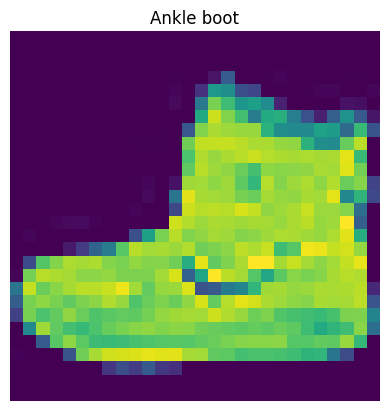

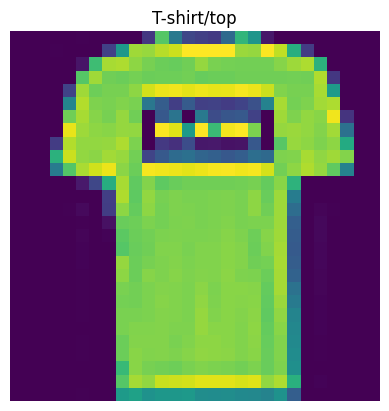

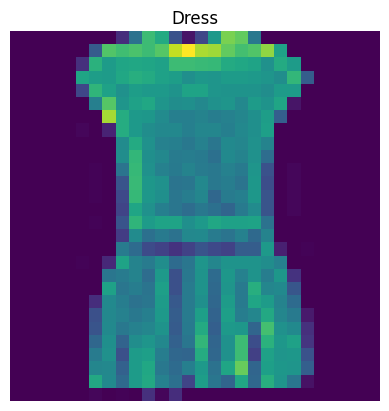

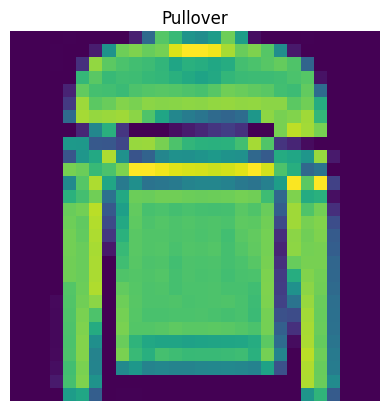

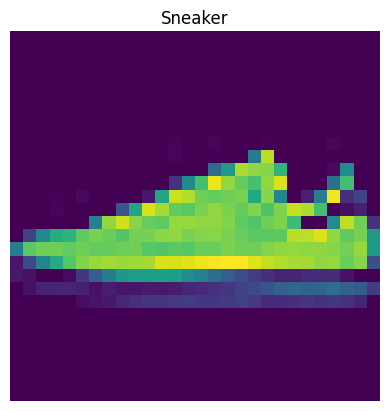

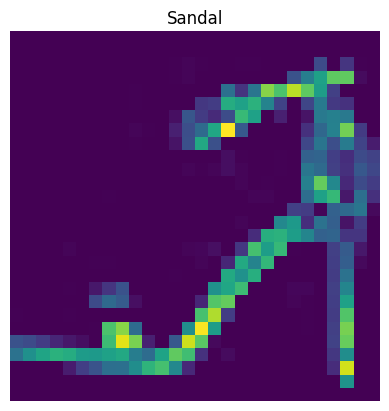

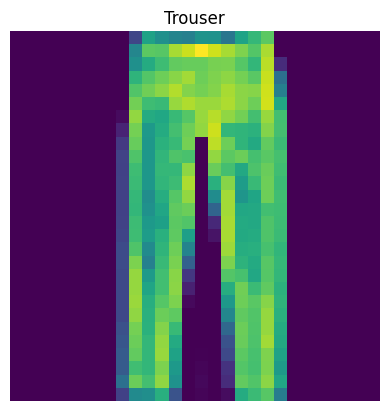

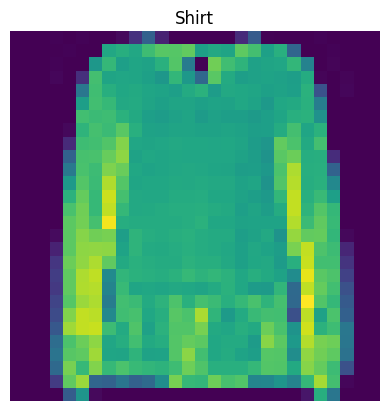

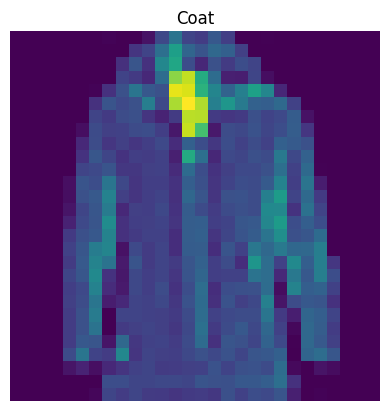

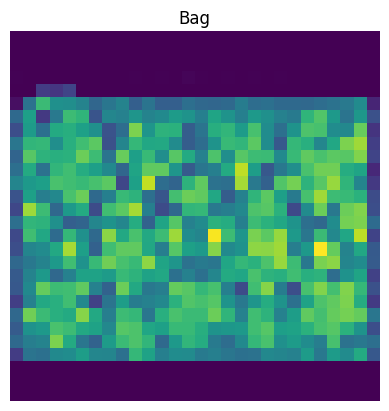

In [40]:
showImage()

#Question 2


In [41]:
n = int(input("Enter number of hidden layers: "))
neurons = int(input("Enter number of neurons in hidden layer:"))

Enter number of hidden layers: 3
Enter number of neurons in hidden layer:16


In [42]:

def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [43]:
def relu(x):
  if x < 0:
    return 0
  else:
    return x

In [44]:
def tanh(x):
  return np.tanh(x)

In [45]:
temp = sigmoid(2)
print(temp)

0.8807970779778823


In [46]:
def softmax(x):
  max_float_value = sys.float_info.max
  sum = 0.0
  for i in range(len(x)):
    if (sum + np.exp(x[i]) <= max_float_value):
      sum += np.exp(x[i])
    else:
      sum = max_float_value
  y = []
  for i in range(len(x)):
    y_i = np.exp(x[i])/sum
    y.append(y_i)
  return y


In [47]:
def initialize_param(input_size, n, neurons):
  W = []
  b = []
  for i in range(0, n+1):
    if i == 0:
      W_i = np.random.rand(neurons,input_size) * 0.01
      W.append(W_i)
    elif i == n:
      W_i = np.random.rand(10,neurons) * 0.01
      W.append(W_i)
    else :
      W_i = np.random.rand(neurons,neurons) * 0.01
      W.append(W_i)

    if i == n:
      b_i = np.random.rand(10,1) * 0.01
      b.append(b_i)
    else :
      b_i = np.random.rand(neurons,1) * 0.01
      b.append(b_i)
  return W, b

In [48]:
def forward_propogation(func, x, W, b, n):
  a = []
  h = []
  for k in range(n+1):
    if k == 0:
      a_k = np.add(np.dot(W[k], x), b[k])
      a.append(a_k)
    else:
      a_k = np.add(np.dot(W[k], h[k-1]), b[k])
      a.append(a_k)
    if k == n: break
    h_k = []
    a[k] = np.clip(a[k], -709.78, 709.78)

    for j in range(neurons):
      if func == "sigmoid":
        h_kj = sigmoid(a[k][j][0])
      elif func == "ReLU":
        h_kj = relu(a[k][j][0])
      elif func == "tanh":
        h_kj = tanh(a[k][j][0])
      h_k.append(h_kj)
    h_k = np.array(h_k).reshape(neurons,1)
    h.append(h_k)
  a[n] = np.clip(a[n], -500, 500)
  y_pred = np.array(softmax(a[n]))
  return a, h, y_pred


In [49]:
x = x_train[0].flatten().reshape(784,1)
x_len = len(x)
# print(x.shape)
W, b= initialize_param(x_len, n, neurons)
# print(W[0].shape)
# print(W[1].shape)
# print(W[2].shape)
# print(b[0].shape)
# print(b[1].shape)
# print(b[2].shape)

a, h, y_pred = forward_propogation("ReLU", x, W, b, n)
# print(a)
# print(h)
# print(y_pred)
# print(y_pred.shape)
# print(y_train[0])

#Question 3

In [50]:
def diff_g(func, a):
  diff_a = []
  if func == "sigmoid":
    for i in a:
      i = np.clip(i, -709.78, 709.78)
      diff_a.append(sigmoid(i[0]) * (1 - sigmoid(i[0])))
  elif func == "tanh":
    for i in a:
      diff_a.append(1 - tanh(i[0]) * tanh(i[0]))
  elif func == "ReLU":
    for i in a:
      if i[0] > 0: diff_a.append(1)
      else :diff_a.append(0)
  diff_a = np.array(diff_a).reshape(len(diff_a),1)
  return diff_a

In [51]:
def back_propogation(func, a, h, y_pred, y, x):
  e_y = np.zeros(10).reshape(10,1)
  e_y[y] = 1

  grad_W = []
  grad_b = []
  grad_h = []
  grad_a = []
  grad_a_n = np.subtract(y_pred, e_y)
  grad_a.append(grad_a_n)
  for k in range(n, -1, -1):
    if k == 0:
      grad_W_k = np.dot(grad_a[len(grad_a) - 1], x.T)
    else:
      grad_W_k = np.dot(grad_a[len(grad_a) - 1], h[k-1].T)

    grad_b_k = grad_a[len(grad_a) - 1]
    grad_W.append(grad_W_k)
    grad_b.append(grad_b_k)

    if k == 0: break

    grad_hprev = np.dot(W[k].T, grad_a[len(grad_a) - 1])

    g = diff_g(func, a[k-1])
    grad_aprev = grad_hprev * g

    grad_h.append(grad_hprev)
    grad_a.append(grad_aprev)

  return grad_W, grad_b




In [52]:
x = x_train[0].flatten().reshape(784,1)
x_len = len(x)
y = y_train[0]

W, b= initialize_param(x_len, n, neurons)

a, h, y_pred = forward_propogation("ReLU", x, W, b, n)
grad_W, grad_b = back_propogation("ReLU",  a, h, y_pred, y, x)
# print(grad_W)
# print(grad_b)


In [53]:
def xavier_initialization(input_size, n, neurons):
  W = []
  b = []
  for i in range(0, n+1):
    if i == 0:
      variance = 6.0 / (input_size + neurons)
      std_dev = np.sqrt(variance)
      W_i = np.random.normal(0, std_dev, size=(neurons, input_size))
      W.append(W_i)
    elif i == n:
      variance = 6.0 / (10 + neurons)
      std_dev = np.sqrt(variance)
      W_i = np.random.normal(0, std_dev, size=(10, neurons))
      W.append(W_i)
    else :
      variance = 6.0 / (neurons + neurons)
      std_dev = np.sqrt(variance)
      W_i = np.random.normal(0, std_dev, size=(neurons, neurons))
      W.append(W_i)

    if i == n:
      variance = 2.0 / (10 + 1)
      std_dev = np.sqrt(variance)
      b_i = np.random.normal(0, std_dev, size=(10, 1))
      # b_i = np.zeros((10,1))
      b.append(b_i)
    else :
      variance = 2.0 / (neurons + 1)
      std_dev = np.sqrt(variance)
      b_i = np.random.normal(0, std_dev, size=(neurons, 1))
      # b_i = np.zeros((neurons,1))
      b.append(b_i)
  return W, b

**Gradient Descent**

In [54]:
def gradient_descent(func, x, y, W, b):
  a, h, y_pred = forward_propogation(func, x, W, b, n)
  grad_W, grad_b = back_propogation(func, a, h, y_pred, y, x)
  return grad_W, grad_b


In [35]:
epochs = 5
batch_size = 64
batch = batch_size
eta = 0.01
func = "ReLU"
W, b= xavier_initialization(len(x), n, neurons)
# print(W)
# print(b)
dw = [np.zeros_like(w) for w in W]
db = [np.zeros_like(bias) for bias in b]
for j in range(epochs):
  for l in range(int(0.9 * len(x_train))):
    i = random.randint(0, int(0.9 * len(x_train)))
    grad_W, grad_b = gradient_descent(func, x_train[i].flatten().reshape(784,1), y_train[i], W, b)
    # print(grad_W)
    # print(grad_b)
    for k in range(len(dw)):
      dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
    for k in range(len(db)):
      db[k] = np.add(db[k], grad_b[len(db) - k - 1])
    batch-=1
    if batch == 0:
      for k in range(len(dw)):
        W[k] = np.subtract(W[k],(eta * dw[k]/batch_size))
      for i in range(len(db)):
        b[k] = np.subtract(b[k],(eta * db[k]/batch_size))
      batch = batch_size
      dw = [np.zeros_like(w) for w in W]
      db = [np.zeros_like(bias) for bias in b]
  # print(W)
  # print(b)
  count = 0
  for i in range(int(0.9 * len(x_train))):
    a, h, y_pred = forward_propogation(func, x_train[i].flatten().reshape(784,1), W, b, n)
    y_p = np.argmax(y_pred)
    if (y_train[i] == y_p):
      count+=1
  print("Training Acc: " , count/54000)

  count = 0
  for i in range(54000, len(x_train)):
    a, h, y_pred = forward_propogation(func, x_train[i].flatten().reshape(784,1), W, b, n)
    y_p = np.argmax(y_pred)
    if (y_train[i] == y_p):
      count+=1
  print("Validation Acc: ", count/6000)


Training Acc:  0.675074074074074
Validation Acc:  0.676
Training Acc:  0.7349074074074075
Validation Acc:  0.734
Training Acc:  0.7576296296296297
Validation Acc:  0.7586666666666667
Training Acc:  0.7772037037037037
Validation Acc:  0.7768333333333334
Training Acc:  0.7870185185185186
Validation Acc:  0.7873333333333333


**Momentum Gradient Descent**

In [56]:
epochs = 5
batch_size = 32
batch = batch_size
eta = 0.01
beta = 0.9
func = "ReLU"
W, b= xavier_initialization(len(x), n, neurons)
# print(W)
# print(b)
prev_vw = [np.zeros_like(w) for w in W]
prev_vb = [np.zeros_like(bias) for bias in b]
dw = [np.zeros_like(w) for w in W]
db = [np.zeros_like(bias) for bias in b]
for j in range(epochs):
  for l in range(int(0.9 * len(x_train))):
    i = random.randint(0, int(0.9 * len(x_train)))
    if batch == batch_size:
      dw = [np.zeros_like(w) for w in W]
      db = [np.zeros_like(bias) for bias in b]
      vw = [np.zeros_like(w) for w in W]
      vb = [np.zeros_like(bias) for bias in b]
    grad_W, grad_b = gradient_descent(func, x_train[i].flatten().reshape(784,1), y_train[i], W, b)
    # print(grad_W)
    # print(grad_b)
    for k in range(len(dw)):
      dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
    for k in range(len(db)):
      db[k] = np.add(db[k], grad_b[len(db) - k - 1])
    batch-=1
    if batch == 0:
      for k in range(len(dw)):
        vw[k] = np.add(vw[k],np.add(beta * prev_vw[k], eta* dw[k]/batch_size))
        W[k] = np.subtract(W[k],vw[k])
      for k in range(len(db)):
        vb[k] = np.add(vb[k],np.add(beta * prev_vb[k], eta*db[k]/batch_size))
        b[k] = np.subtract(b[k],vb[k])
      prev_vw = vw
      prev_vb = vb
      batch = batch_size

  # print(W)
  # print(b)
  count = 0
  for l in range(int(0.9 * len(x_train))):
    a, h, y_pred = forward_propogation(func, x_train[i].flatten().reshape(784,1), W, b, n)
    y_p = np.argmax(y_pred)
    if (y_train[i] == y_p):
      count+=1
  print("Training Acc: " , count/54000)

  count = 0
  for i in range(54000, len(x_train)):
    a, h, y_pred = forward_propogation(func, x_train[i].flatten().reshape(784,1), W, b, n)
    y_p = np.argmax(y_pred)
    if (y_train[i] == y_p):
      count+=1
  print("Validation Acc: ", count/6000)


Training Acc:  1.0
Validation Acc:  0.8313333333333334
Training Acc:  0.0
Validation Acc:  0.8346666666666667
Training Acc:  1.0
Validation Acc:  0.8443333333333334
Training Acc:  0.0
Validation Acc:  0.8583333333333333
Training Acc:  1.0
Validation Acc:  0.7953333333333333


**Nestrov Gradient Descent**

In [66]:
epochs = 5
batch_size = 32
batch = batch_size
eta = 0.01
beta = 0.9
func = "ReLU"
W, b= xavier_initialization(len(x), n, neurons)
# print(W)
# print(b)
prev_vw = [np.zeros_like(w) for w in W]
prev_vb = [np.zeros_like(bias) for bias in b]
dw = [np.zeros_like(w) for w in W]
db = [np.zeros_like(bias) for bias in b]
W_new = [np.zeros_like(w) for w in W]
b_new = [np.zeros_like(bias) for bias in b]

for j in range(epochs):
  for i in range(int(0.9 * len(x_train))):
    if batch == batch_size:
      dw = [np.zeros_like(w) for w in W]
      db = [np.zeros_like(bias) for bias in b]
      W_new = [np.zeros_like(w) for w in W]
      b_new = [np.zeros_like(bias) for bias in b]
      for k in range(len(dw)):
        vw[k] = beta * prev_vw[k]
      for k in range(len(db)):
        vb[k] = beta * prev_vb[k]
      for k in range(len(dw)):
        W_new[k] = np.subtract(W[k],vw[k])
      for k in range(len(db)):
        b_new[k] = np.subtract(b[k],vb[k])

    grad_W, grad_b = gradient_descent(func, x_train[i].flatten().reshape(784,1), y_train[i], W_new, b_new)
    # print(grad_W)
    # print(grad_b)
    for k in range(len(dw)):
      dw[k] = np.add(dw[k], grad_W[len(dw) - k - 1])
    for k in range(len(db)):
      db[k] = np.add(db[k], grad_b[len(db) - k - 1])
    batch-=1

    if batch == 0:
      for k in range(len(dw)):
        vw[k] = np.add(vw[k],np.add(beta * prev_vw[k], eta* dw[k]/batch_size))
        W[k] = np.subtract(W[k],vw[k])
      for k in range(len(db)):
        vb[k] = np.add(vb[k],np.add(beta * prev_vb[k], eta*db[k]/batch_size))
        b[k] = np.subtract(b[k],vb[k])
      prev_vw = vw
      prev_vb = vb
      batch = batch_size

  # print(W)
  # print(b)
  count = 0
  for l in range(int(0.9 * len(x_train))):
    a, h, y_pred = forward_propogation(func, x_train[i].flatten().reshape(784,1), W, b, n)
    y_p = np.argmax(y_pred)
    if (y_train[i] == y_p):
      count+=1
  print("Training Acc: " , count/54000)

  count = 0
  for i in range(54000, len(x_train)):
    a, h, y_pred = forward_propogation(func, x_train[i].flatten().reshape(784,1), W, b, n)
    y_p = np.argmax(y_pred)
    if (y_train[i] == y_p):
      count+=1
  print("Validation Acc: ", count/6000)

  count = 0
  for i in range(54000, len(x_train)):
    a, h, y_pred = forward_propogation(func, x_train[i].flatten().reshape(784,1), W, b, n)
    y_p = np.argmax(y_pred)
    if (y_train[i] == y_p):
      count+=1
  print(count/6000)


<ipython-input-46-c560c9a39837>:6: RuntimeWarning: overflow encountered in add
  a_k = np.add(np.dot(W[k], x), b[k])
<ipython-input-66-d2e74301ee32>:31: RuntimeWarning: overflow encountered in subtract
  b_new[k] = np.subtract(b[k],vb[k])
<ipython-input-66-d2e74301ee32>:48: RuntimeWarning: overflow encountered in subtract
  b[k] = np.subtract(b[k],vb[k])
<ipython-input-66-d2e74301ee32>:29: RuntimeWarning: overflow encountered in subtract
  W_new[k] = np.subtract(W[k],vw[k])


0.105
0.105
0.105
0.105
0.105
